In [11]:
import pandas as pd
import numpy as np
from pprint import pprint

from utils import get_dfs, concat_output_filename, load_head_items
from prep_organized_boycotts import (
    group_by_age, group_by_gender, group_by_genre,
    group_by_occupation, group_by_power, group_by_state, group_by_genre_strict
)
dfs = get_dfs('ml-20m')
users_df = dfs['users']
ratings_df = dfs['ratings']
print(users_df.head())
print(ratings_df.head())

Path to ratings file is: C:\Users\Nick/.surprise_data/ml-20m/ml-20m/ratings.csv
   user_id  movie_id  rating  unix_timestamp
0        1         2     3.5      1112486027
1        1        29     3.5      1112484676
2        1        32     3.5      1112484819
3        1        47     3.5      1112484727
4        1        50     3.5      1112484580
   user_id
0        1
1        2
2        3
3        4
4        5
   user_id  movie_id  rating  unix_timestamp
0        1         2     3.5      1112486027
1        1        29     3.5      1112484676
2        1        32     3.5      1112484819
3        1        47     3.5      1112484727
4        1        50     3.5      1112484580


Mean
rating    3.525529
dtype: float64
Mean Along Users
3.627208621886526
26744


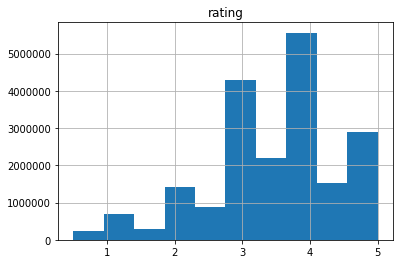

In [12]:
import matplotlib.pyplot as plt
ratings_df[['rating']].hist()
print('Mean')
print(ratings_df[['rating']].mean())
print('Mean Along Users')
user_to_mean = ratings_df.groupby(['user_id']).mean()[['rating']]
print(np.mean(user_to_mean.rating))

print(len(ratings_df.groupby(['movie_id'])))

plt.show()

In [13]:
print(ratings_df[['rating']].count().mean())
print('Counts')
count_ratings = ratings_df.groupby(['movie_id']).count().rating.mean()
count_hits = ratings_df[ratings_df.rating>=4].groupby(['user_id']).count().rating.mean()
print(count_ratings, count_hits)
print(count_ratings/5, count_hits/5)

20000263.0
Counts
747.8411232425965 72.28018541149928
149.5682246485193 14.456037082299854


In [14]:
total_hits = len(ratings_df[ratings_df.rating>=4])
print(total_hits, total_hits/5)

9995410 1999082.0


C:\Users\Nick\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


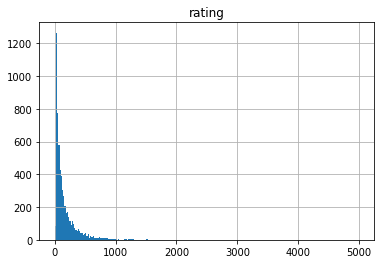

In [6]:
ratings_df[['user_id', 'rating']].groupby(['user_id']).count().hist(bins=np.linspace(0, 5000.0, 5000.0/20))
plt.show()

In [7]:
tmp = ratings_df[['user_id', 'rating']].groupby(['user_id']).count()
tmp2 = tmp[(tmp.rating >= 20) & (tmp.rating < 500)]
tmp3 = tmp[(tmp.rating >= 1000) & (tmp.rating < 2000)]
print(sum(tmp2.rating))
print(sum(tmp3.rating))

709900
48579


In [8]:
count = len(ratings_df[ratings_df.rating >=4])
print(count)
counts = []
for name, group in ratings_df.groupby(['user_id']):
    count = len(group[group.rating >= 4].index) / len(group.index)
    #print(count)
    counts.append(count)
print(np.mean(counts))

575281
0.6228466508116265


In [9]:
uids = list(set(ratings_df.user_id))
uids_to_drop = np.random.choice(uids, int(len(uids) * 7/10))

mask = ratings_df.user_id.isin(uids_to_drop)
post_drop = ratings_df[~mask]
dropped = ratings_df[mask]

print('Mean')
print(np.mean(post_drop.rating))

movie_to_mean = post_drop.groupby(['movie_id']).mean()[['rating']]
#print(movie_to_mean)
print('Mean Along Movies')
print(np.mean(movie_to_mean.rating))

user_to_mean = post_drop.groupby(['user_id']).mean()[['rating']]
print('Mean Along Users')
print(np.mean(user_to_mean.rating))

# for i, ratingrow in dropped.iterrows():
        
#     #dropped.hist()
#     #print(dropped.mean())
#     vals.append(post_drop.mean())
#dropped.hist()
plt.show()

Mean
3.5814928270549755
Mean Along Movies
3.2224749317404155
Mean Along Users
3.7005455281904336
